# [Goulib](../notebook.ipynb).image
image processing made easy

Combines flexibility of [PIL Python Imaging Library (Pillow)](https://pypi.python.org/pypi/Pillow/) with the power of [scikit-image](http://scikit-image.org/) embedded in an easy to use Image class

In [1]:
from Goulib.notebook import *
from Goulib.image import *

In [2]:
lena_original=Image('../tests/data/lena.png') #Image can be init'ed from a path

In [3]:
from skimage import data
camera_original=Image(data.camera()) #or from an array

In [4]:
# Image has many "PIL compatible" methods, but they always return a result Image
# instead of working in-place :
size=(128,128)
lena=lena_original.resize(size)
lena_gray=lena.grayscale()
camera=camera_original.resize(size)

## Rendering

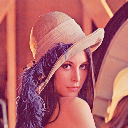

In [5]:
lena #images have a default HTML representation

,,
lena,lena gray,camera

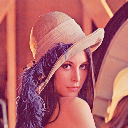
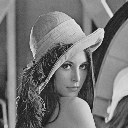
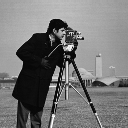

In [6]:
from Goulib.table import Table # images can also be put in tables ! and they're responsive !
Table([[lena,lena_gray,camera],['lena','lena gray','camera']])

## Image modes and Conversions

In [7]:
#Images have an attached immutable "mode" string:
print(str(lena)) #usually RGB(A) (float) for color images
print(str(lena_gray)) #gray images can be either F (float)
print(str(camera)) #or L (int)

In [8]:
print(modes) #supported modes are those from scipy + those from PIL (but in float instead of uint)

In [9]:
# converters #conversion functions span a graph between modes

,,,,,,,,,,,
1,CMYK,F,HSV,I,L,LAB,P,RGB,RGBA,U,XYZ

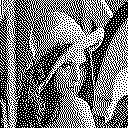
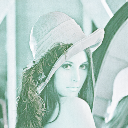
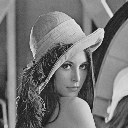
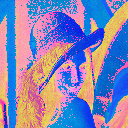
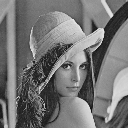
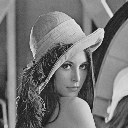
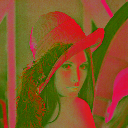
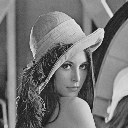
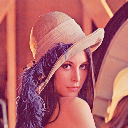
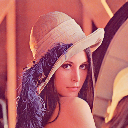
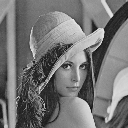
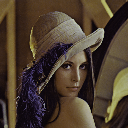

In [10]:
#conversions from/to any mode are implemented by traversing the graph automagically
lena_conv=dict((mode, lena.convert(mode)) for mode in modes)
Table([[lena_conv[m],m] for m in sorted(lena_conv)]).transpose()

note that displaying multi channel images assumes RGB(A) images, so for the above images we have:
- LAB : L=Red, A=Green, B=Blue (low)
- HSV : H=Red, S=Green, V=Blue
- CMYK: C=RED (almost zero), M=Green, Y=Blue, K=Alpha transparency (hence the image is low contrast)

## Color / Planes separation and reconstruction

Lena,Gray,R,G,B
,,,,

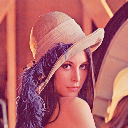
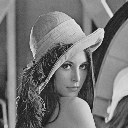
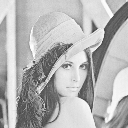
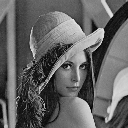
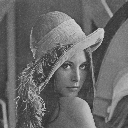

In [11]:
lena_rgb=lena.split() #extract gray level images from each channel
images=[lena,lena_gray]+lena_rgb
Table([images],titles=['Lena','Gray']+[c for c in lena.mode]) 

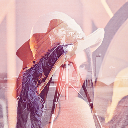

In [12]:
camera=camera.convert('F') #not all conversions are automatic yet ...
Image(lena_rgb+[-camera]) # merges color planes and use camera as alpha channel

Lena,L,A,B
,,,

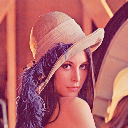
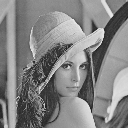
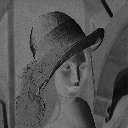
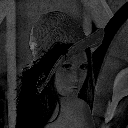

In [13]:
lena_lab=lena_conv['LAB'].split() #extract gray level images from each channel
images=[lena]+lena_lab
Table([images],titles=['Lena']+[c for c in lena_conv['LAB'].mode]) 

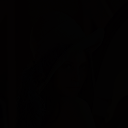

In [14]:
Image(lena_lab,'LAB').convert('RGB')
lena_conv['LAB'].convert('RGB')

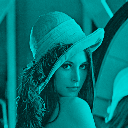

In [15]:
lena_gray*'cyan' #gray colors can be multiplied by a color to make a colorized image

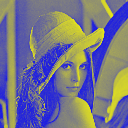

In [16]:
lena_gray.colorize('blue','yellow') #colorize between specified black and white colors

Cyan,Magenta,Yellow,blacK
,,,
,,,

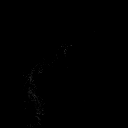
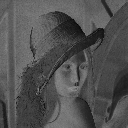
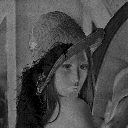
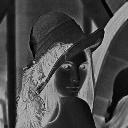
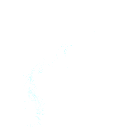
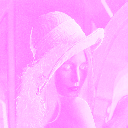
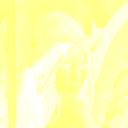
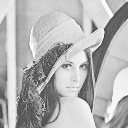

In [17]:
colors=['Cyan','Magenta','Yellow','blacK']
cmyk=lena.split('CMYK') # converts from RGB to CMYK under the hood
cmyk2=[im.colorize(col) for im,col in zip(cmyk,colors)] 
Table([cmyk,cmyk2],titles=colors)

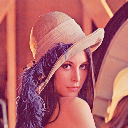

In [18]:
cmyk2[0]-(-cmyk2[1])-(-cmyk2[2])-(-cmyk2[3]) #what a strange syntax ...

## Dithering


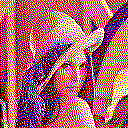

In [19]:
lena_dither=lena.dither() # applies automatically to RGB planes
print(lena_dither,'1 bit dithering')


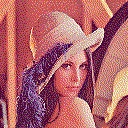

In [20]:
print(lena.dither(n=4),'2 bit dithering')

## Hash and Distances

"Image.average_hash" is implemented as [described here](http://www.hackerfactor.com/blog/index.php?/archives/432-Looks-Like-It.html)

this hash is independent of image mode or size, which makes it perfect for finding duplicates in hudge images collections

moreover, it can be used to compute "distance" between images very quickly:

Lena,Dither,Gray,Negative,Camera
,,,,
2206374220586495537,2206409404958583321,2206374220586495537,4711154807054586323,2301277319912202147
0,0.16,0,2.00,0.88

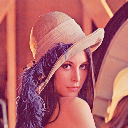
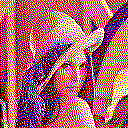
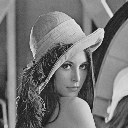
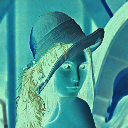
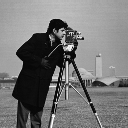

In [21]:
images=[lena,lena_dither,lena_gray,-lena,camera]
hashes=list(map(hash,images))
dist=[im.dist(lena) for im in images]
Table([images,hashes,dist],titles=['Lena','Dither','Gray','Negative','Camera',])

notice that a distance of 1 means "totally different" while a distance of 2 means "inverted

dist(lena,lena_dither) is very small, showing very little sensitivity to quantization

## Canvas and geometric transformations

,,,,,"ERROR : Image(mode=RGB shape=(150, 150, 3) type=float64) _repr_html_ failed : image has min=-0.0981680058799 max=1.07737502082 range"

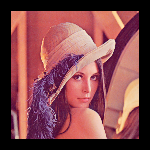
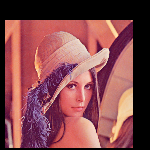
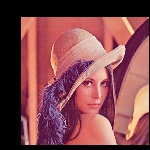
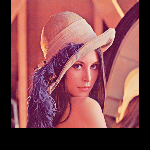
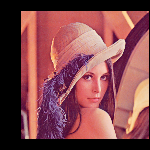

In [22]:
images=[
    lena.expand((150,150)),       # centered by default
    lena.expand((150,150),5,20),  # dx,dy offset
    lena.expand((150,150),-1,-5), # negative offsets wr to lower right
    lena.expand((150,150),None,0),#centered in X, offset in Y
    lena.expand((150,150),-1,None),#centered in Y, offset in X
    lena.expand((150,150),0,0).shift(3.25,2.5) #and we can do SUBPIXEL shifts !!!
]
Table([images])
    

,"ERROR : Image(mode=RGB shape=(129, 129, 3) type=float64) _repr_html_ failed : image has min=-0.102181160768 max=1.10051869423 range"

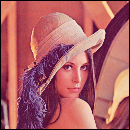

In [23]:
images=[
    lena.expand((130,130),1,1), # 1 pixel border
    lena.expand((129,129),0.5,0.5) #  half pixel border ... can you see the difference?
    ]
Table([images])

## Slices, composition

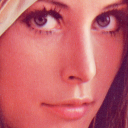

In [24]:
face=lena_original[246:374,225:353] # images can be sliced . Note the first coordinate is Y, then X
face

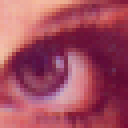

In [25]:
eye=face[3:35,-35:-3] # negative indexes are handy in some cases
eye.scale(4)

In [26]:
left=lena_original[:,0:256]
right=lena_original[:,256:]
stitched=Image(size=(513,513),mode='RGB',color='white')
stitched.add(left,(0,0))
stitched.add(right.shift(1,0),(256,0))
stitched

ValueError: could not broadcast input array from shape (512,256,3) into shape (256,512,3)

## Correlation

In [ ]:
face.grayscale().correlation(eye.grayscale())

## Image Creation

In [ ]:
# Image can be created from standard Python lists and iterators, which are automatically normalized
# colormaps can be used to generate color images
from matplotlib import cm
a=[[-x*x+y*y for x in range(128)] for y in range(128)]
Table([[Image(a),Image(a,colormap=cm.spectral)]])

In [ ]:
mask=disk(64)
Table([[lena+mask,lena-mask,lena*mask]])

## Filtering
gray level filters are automatically applied to RGB color planes and results re-merged in a color image

In [ ]:
from PIL.ImageFilter import *
pilfilters=[BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE, EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN]
lena_filtered=[lena.filter(f) for f in pilfilters]
from Goulib.itertools2 import reshape
Table(reshape(lena_filtered,(0,5))) # nice way to limit table width, isn't it ?

In [ ]:
R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = lena_rgb[R].point(lambda i: 0 if i < 100 else 255)

# process the green band
out = lena_rgb[G].point(lambda i: i * 0.1)

# paste the processed band back, but only where red was < 100
lena_rgb[R].paste(out, None, mask)

# build a new multiband image
Image(lena_rgb)

## scikit-image
advanced image processing thanks to http://scikit-image.org/

In [ ]:
# filtering function can be passed directly to Image.filter method, and (RGB) channels are handled automatically
from skimage.filters import *
from skimage.restoration import denoise_bilateral
#demo with all filters that need no extra parameter
skifilters=[ sobel, sobel_h, sobel_v,
            prewitt, prewitt_h, prewitt_v,
            scharr, scharr_h, scharr_v,
            roberts, roberts_neg_diag, roberts_pos_diag,
            denoise_bilateral, ]
lena_filtered=[lena.filter(f) for f in skifilters]
Table(reshape(lena_filtered,(0,6)))

In [ ]:
# the following filters need extra parameters:
from skimage.filters import LPIFilter2D, gabor_filter, gaussian_filter, median, rank_order, wiener
from skimage.filters import threshold_adaptive, threshold_isodata, threshold_li, threshold_otsu, threshold_yen
from skimage.feature import canny
from skimage.restoration import denoise_tv_bregman, denoise_tv_chambolle

In [ ]:
dir(skimage)